In [1]:
# librerias necesarias     
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

# importo base de datos MNIST 
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

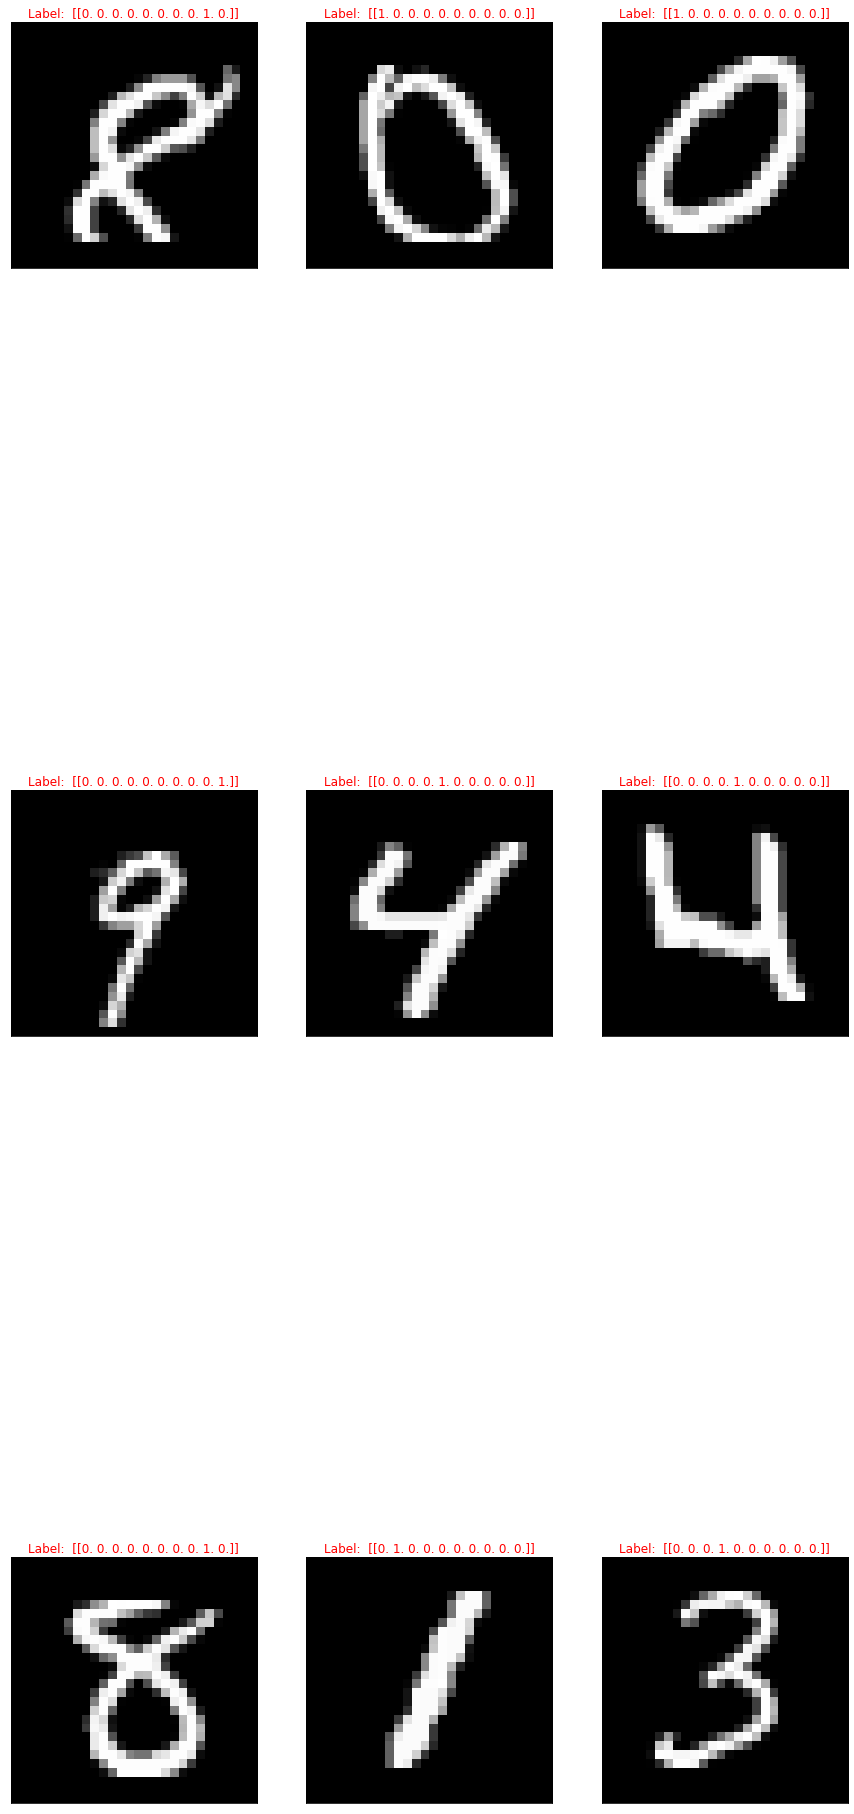

In [3]:
# visualizamos algunas imagenes
fig, ax = plt.subplots(3, 3, figsize=[15, 40])

random_image = np.random.randint(low=0, high=55000, size=1)

for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=55000, size=1)

       ax[i,j].imshow(mnist.train.images[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Label:  ' + str(mnist.train.labels[random_image]), color='r')


#fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

# Definición y entrenamiento del modelo con 5 capas ocultas

In [4]:
entrada = Input(shape=(784,))
layer1 = Dense(32, activation='sigmoid')(entrada)

layer2 = Dense(48, activation='sigmoid')(layer1)
layer3 = Dense(96, activation='sigmoid')(layer2)
layer4 = Dense(120, activation='sigmoid')(layer3)
layer5 = Dense(80, activation='sigmoid')(layer4)

predicciones = Dense(10, activation='softmax')(layer5)

###

In [0]:
model = Model(inputs=entrada, outputs=predicciones)

In [6]:
### optimizador y funcion de costo definidos

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
## para guardar el modelo
filepath = "prueba1.h5"
model_checkpoint = ModelCheckpoint(filepath, monitor='loss',verbose=1, save_best_only=True)

In [8]:
history = model.fit(mnist.train.images, mnist.train.labels,validation_split=0.1,  
              batch_size=32,
              epochs=50, validation_data=(mnist.test.images, mnist.test.labels), callbacks=[model_checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 10000 samples
Epoch 1/50





55000/55000 [==============================] - 4s 78us/step - loss: 1.2249 - acc: 0.5527 - val_loss: 0.6275 - val_acc: 0.7945

Epoch 00001: loss improved from inf to 1.22486, saving model to prueba1.h5
Epoch 2/50
55000/55000 [==============================] - 4s 64us/step - loss: 0.4990 - acc: 0.8595 - val_loss: 0.3999 - val_acc: 0.8967

Epoch 00002: loss improved from 1.22486 to 0.49900, saving model to prueba1.h5
Epoch 3/50
55000/55000 [==============================] - 4s 64us/step - loss: 0.3674 - acc: 0.9025 - val_loss: 0.3535 - val_acc: 0.9086

Epoch 00003: loss improved from 0.49900 to 0.36744, saving model to prueba1.h5
Epoch 4/50
55000/55000 [==============================] - 3s 64us/step - loss: 0.3187 - acc: 0.9157 - val_loss: 0.3080 - val_acc: 0.9219

Epoch 00004: loss improved from 0.36744 to 0.31874, saving mode

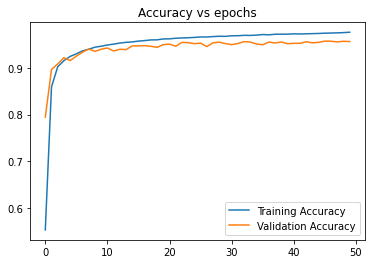

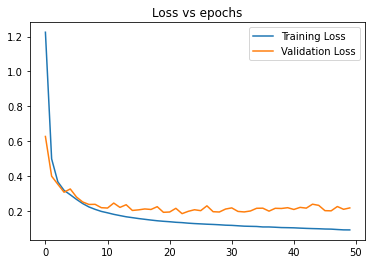

In [9]:
## visuzalimos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss'])

In [10]:
## A completar: utilizar imagenes de testeo

predicciones = model.predict(mnist.test.images)
print(predicciones.shape)
##

(10000, 10)


In [11]:
#fig, ax = plt.subplots(3, 3, figsize=[15, 40])

A = []
B = []
posicion = []

for k in range (10000):


  if np.argmax(mnist.test.labels[k]) != np.argmax(predicciones[k]):


    A.append(mnist.test.images[k])
    a = np.array(A)
    B.append(predicciones[k])
    b = np.array(B)
    posicion.append(k)
    
print(a.shape)
print(posicion)

(434, 784)
[18, 20, 158, 185, 211, 217, 241, 247, 259, 264, 320, 321, 324, 359, 381, 435, 445, 478, 495, 536, 582, 583, 610, 618, 659, 674, 691, 716, 717, 720, 726, 740, 877, 881, 895, 900, 947, 951, 956, 965, 982, 998, 1014, 1017, 1032, 1062, 1079, 1114, 1156, 1164, 1181, 1182, 1191, 1192, 1198, 1206, 1226, 1232, 1260, 1289, 1299, 1315, 1326, 1328, 1345, 1364, 1393, 1413, 1422, 1433, 1444, 1465, 1466, 1467, 1494, 1500, 1520, 1522, 1525, 1530, 1549, 1553, 1569, 1609, 1626, 1671, 1678, 1681, 1709, 1717, 1721, 1727, 1737, 1751, 1754, 1800, 1843, 1878, 1901, 1941, 1952, 1955, 1968, 1970, 1981, 1984, 2004, 2024, 2040, 2044, 2070, 2107, 2109, 2118, 2125, 2129, 2130, 2135, 2162, 2179, 2182, 2185, 2189, 2224, 2266, 2272, 2291, 2293, 2305, 2325, 2329, 2338, 2362, 2369, 2380, 2387, 2393, 2395, 2406, 2422, 2437, 2454, 2455, 2478, 2488, 2514, 2526, 2560, 2574, 2582, 2598, 2607, 2654, 2658, 2698, 2720, 2730, 2743, 2771, 2836, 2877, 2896, 2915, 2921, 2927, 2939, 2953, 2970, 2989, 2995, 3005, 3030, 

# 9 imagenes mal clasificadas por el modelo

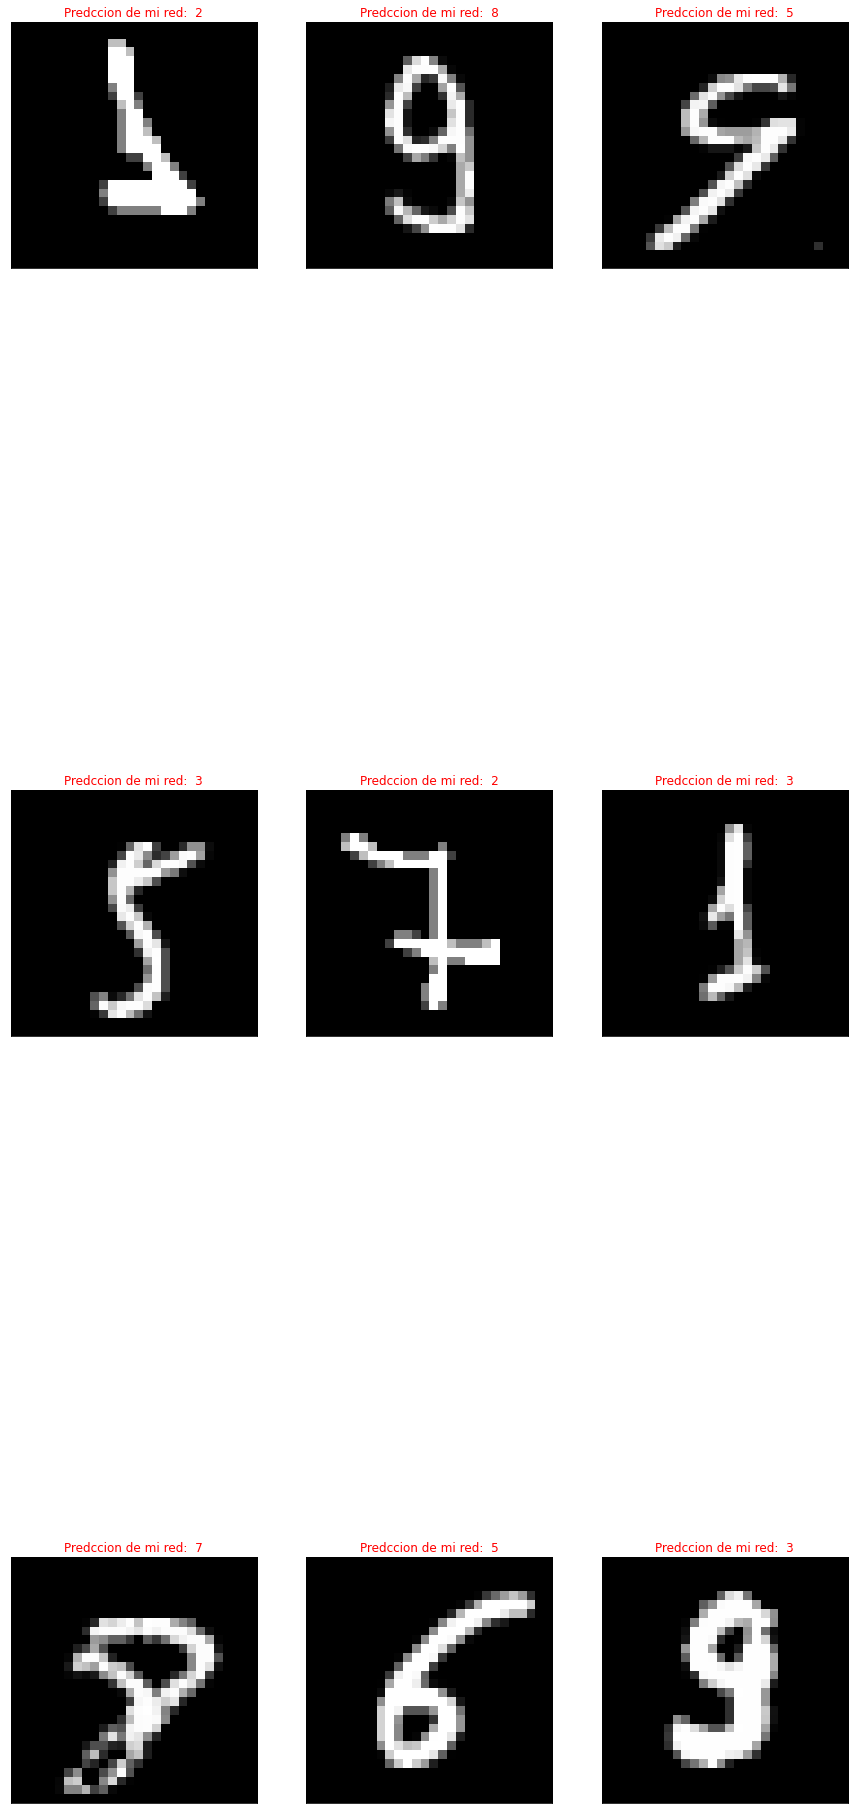

In [12]:
fig, ax = plt.subplots(3, 3, figsize=[15, 40])


for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=376, size=1)

       ax[i,j].imshow(a[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Predccion de mi red:  ' + str(np.argmax(b[random_image])), color='r')

plt.show()


# 9 imagenes elegidas al azar del grupo de test 

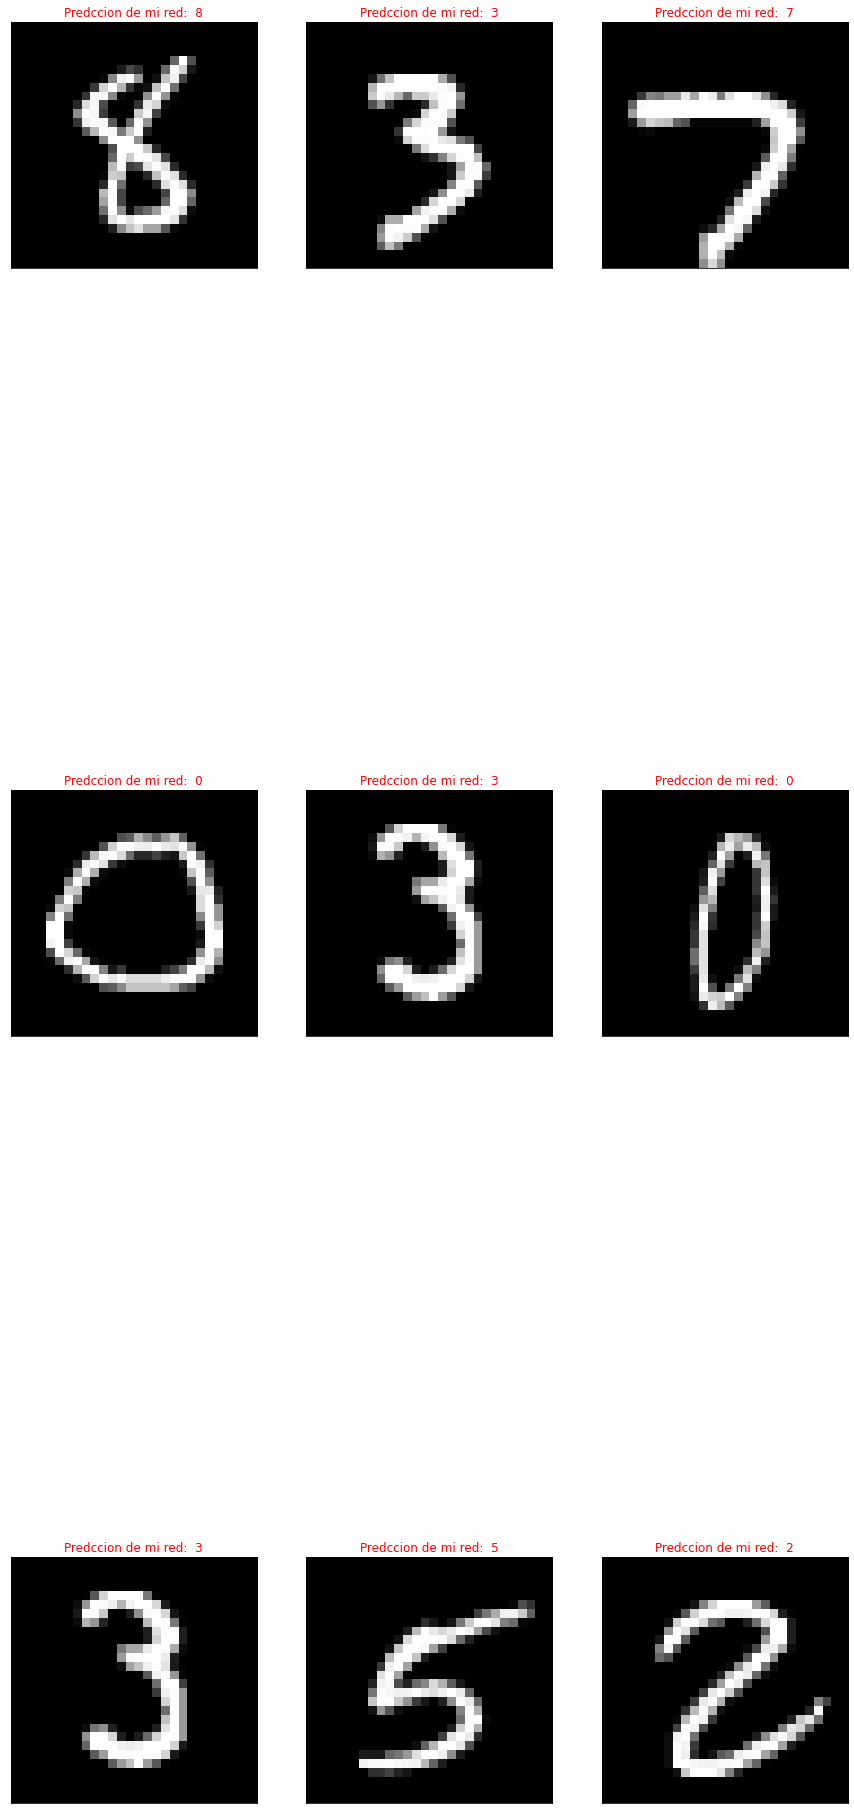

In [13]:
fig, ax = plt.subplots(3, 3, figsize=[15, 40])


for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=1000, size=1)

       ax[i,j].imshow(mnist.test.images[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Predccion de mi red:  ' + str(np.argmax(predicciones[random_image])), color='r')

plt.show()